In [1]:
pip install -r "../requirement.txt"

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirement.txt'


In [2]:
# make ML and DL tools visible to system
import sys
import os
dirname = os.path.abspath('')
sys.path.append(os.path.join(dirname,'ML/tools/'))
sys.path.append(os.path.join(dirname,'DL/tools/'))

import matplotlib.pyplot as plt
import torch
import joblib

from sklearn.preprocessing import FunctionTransformer
from tabulate import tabulate
from f3dasm import ExperimentData

# ML imports
import l2o_modified as l2o
from CustomStrategies import SingleLabelStrategy
from DataLoading import train_test_split

# DL imports
import UsefulFunctions as uf
from UsefulFunctions import Net

In [3]:
# constants
PROJ_DIR = 'Datasets/big_dataset'
MODEL_PATH = 'ML/models/best_model_untuned'
RANDOM_STATE = 42
VAL_SIZE = 0.2
STRATIFIED = True

## Data Preparation

In [14]:
# import dataset
experimentdata = ExperimentData.from_file(os.path.join(dirname, PROJ_DIR))
dataset = l2o.open_all_datasets_post(experimentdata).dropna(dim='itemID', how='any')


In [15]:
# get subset itemIDs
subsets = uf.subsets(dataset)

## Analysis of optimizers on different subsets

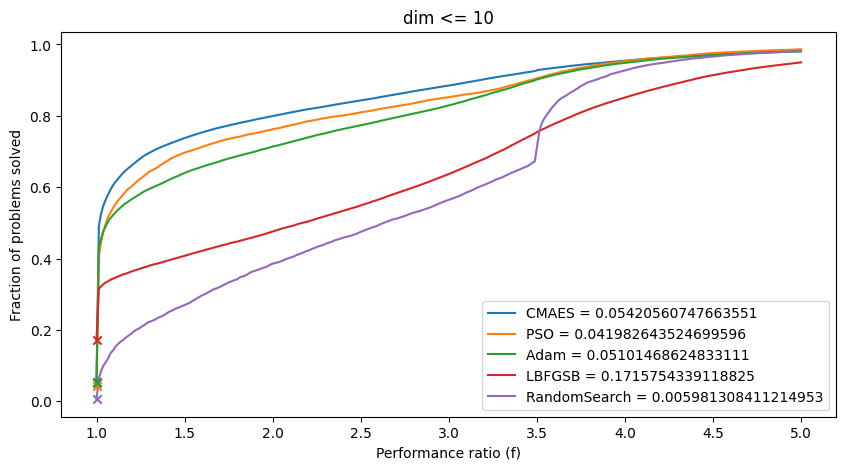

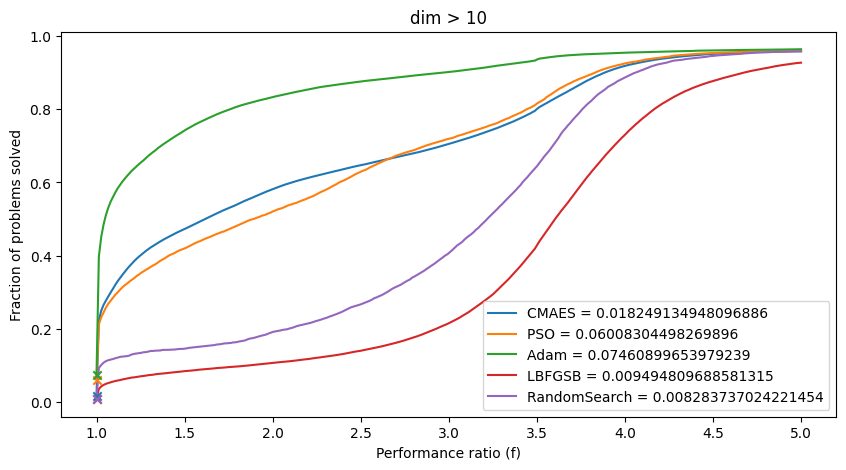

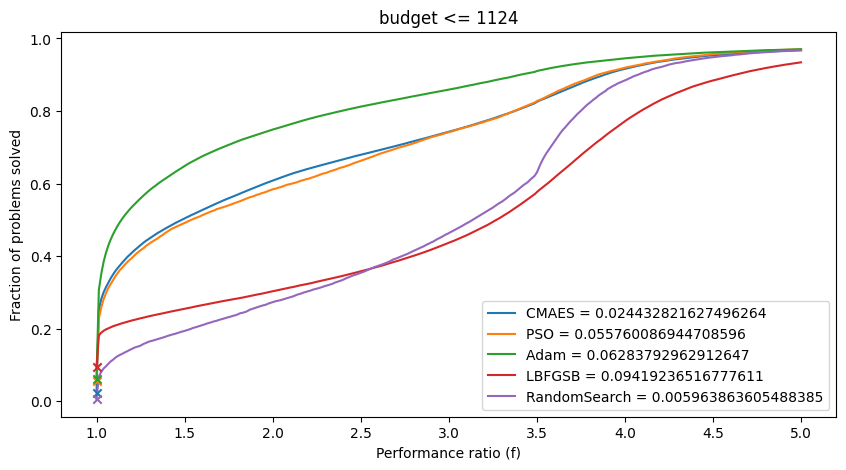

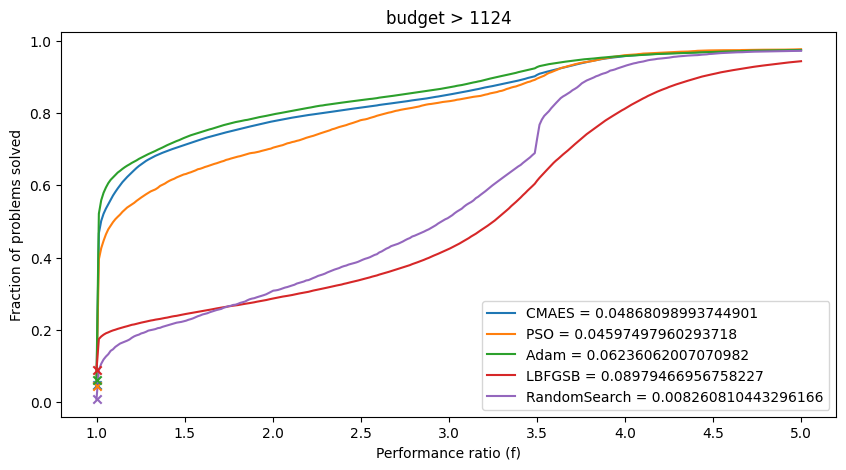

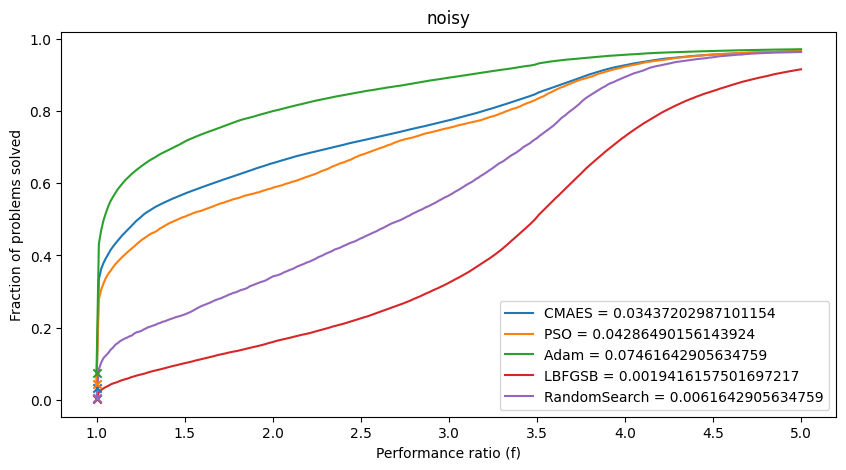

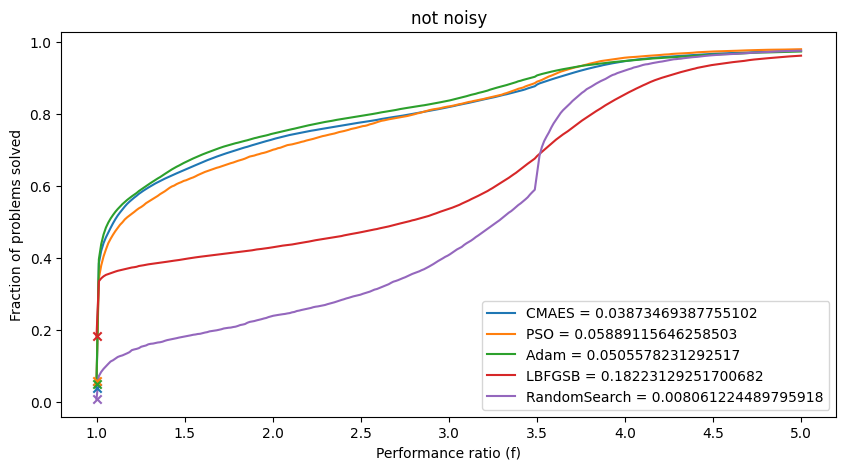

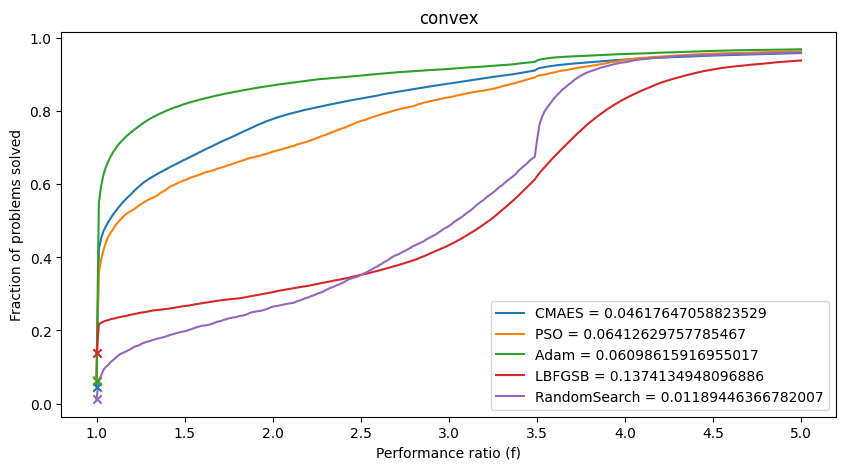

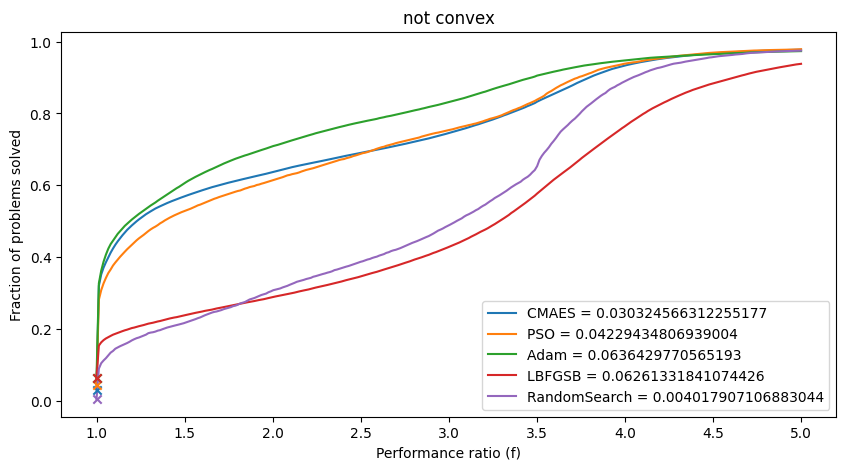

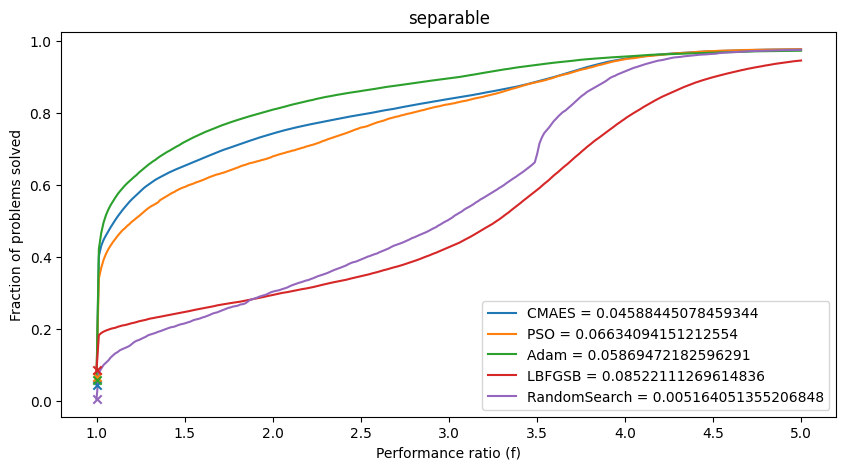

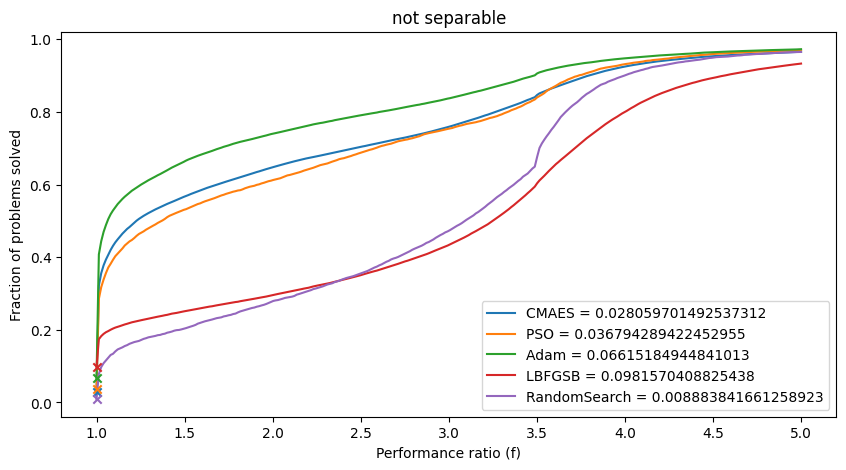

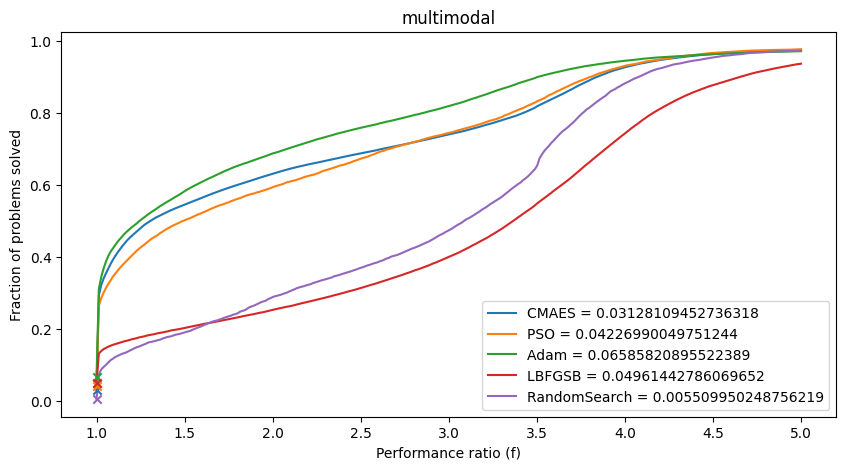

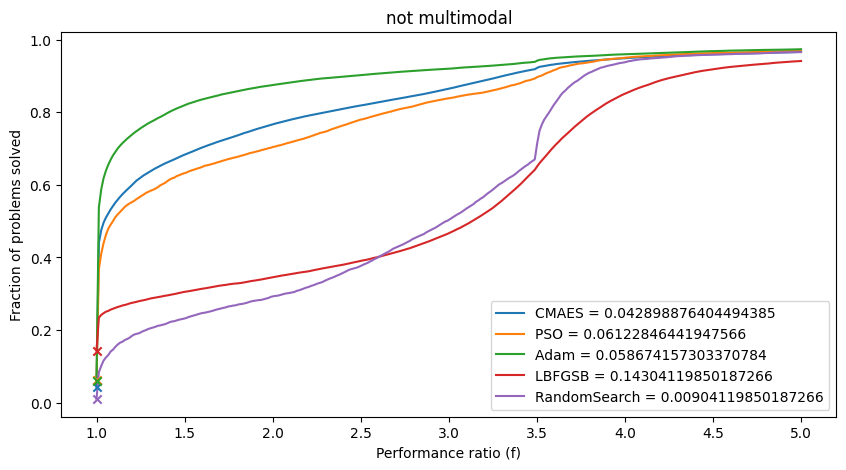

In [8]:
# plot performance profiles on subsets
for name, IDs in subsets.items():
    l2o.plot_perf_profile(dataset.sel(itemID=IDs))
    plt.title(name)
    plt.show()

In [9]:
# optimizers on sub-sets results

data = [["Dim <= 10", "CMAES", "RandomSearch"], 
        ["Dim > 10", "Adam", "LBFGSB"],
        ["budget <= 1124", "Adam", "RandomSearch"],
        ["budget > 1124", "Adam", "LBFGSB"],
        ["noisy", "Adam", "LBFGSB"],
        ["not noisy", "Adam", "RandomSearch"],
        ["convex", "Adam", "RandomSearch"],
        ["not convex", "Adam", "LBFGSB"],
        ["seperable", "Adam", "LBFGSB"],
        ["not seperable", "Adam", "RandomSearch"],
        ["multimodal", "Adam", "LBFGSB"],
        ["not multimodal", "Adam", "RandomSearch"]]
  
# define header names
col_names = ["Subset", "Best optimizer", "Worst optimizer"]
  
# display table
print(tabulate(data, headers=col_names, tablefmt="github"))

| Subset         | Best optimizer   | Worst optimizer   |
|----------------|------------------|-------------------|
| Dim <= 10      | CMAES            | RandomSearch      |
| Dim > 10       | Adam             | LBFGSB            |
| budget <= 1124 | Adam             | RandomSearch      |
| budget > 1124  | Adam             | LBFGSB            |
| noisy          | Adam             | LBFGSB            |
| not noisy      | Adam             | RandomSearch      |
| convex         | Adam             | RandomSearch      |
| not convex     | Adam             | LBFGSB            |
| seperable      | Adam             | LBFGSB            |
| not seperable  | Adam             | RandomSearch      |
| multimodal     | Adam             | LBFGSB            |
| not multimodal | Adam             | RandomSearch      |


## Analysis of final model on different subsets

In [10]:
# load final model

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#net = torch.load('ready_files/DL_best_model.pt', map_location=device)
#scaler = joblib.load('ready_files/scaler.save')
#own_strategy = uf.YourStrategy(net, scaler, device, 'Net')

model = joblib.load(os.path.join(dirname, MODEL_PATH))
scaler = FunctionTransformer() # identity transformer

own_strategy = SingleLabelStrategy(model, scaler)

In [17]:
# validation subsets

#_, _, datasets = uf.split(X, yID, dataset, VAL_SIZE, RANDOM_STATE)
#dataset_train, dataset_val = datasets

dataset_train, dataset_val = train_test_split(dataset, test_size=VAL_SIZE, stratified=STRATIFIED, random_state=RANDOM_STATE)

subsets_val = uf.subsets(dataset_val)

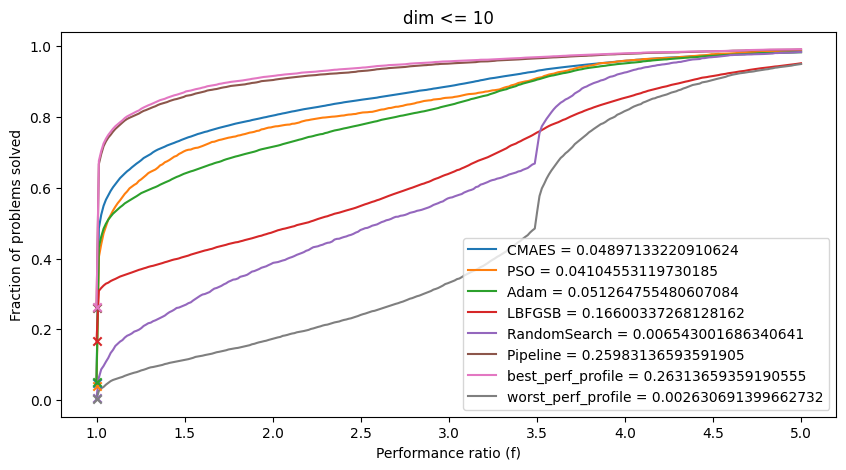

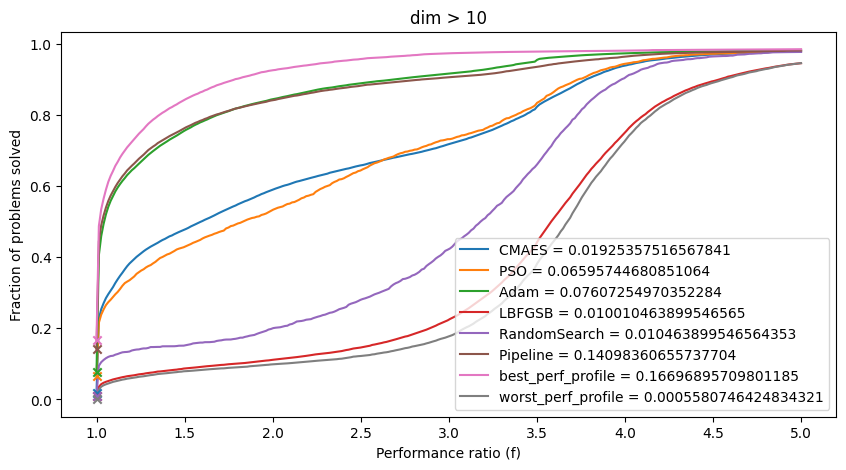

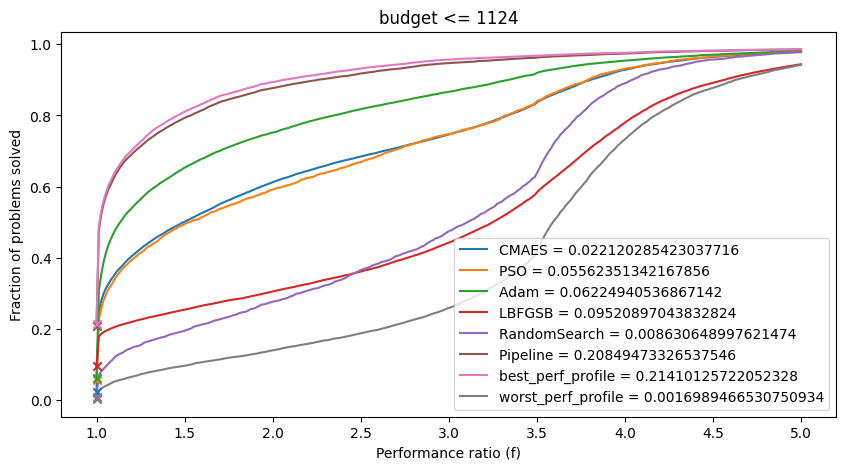

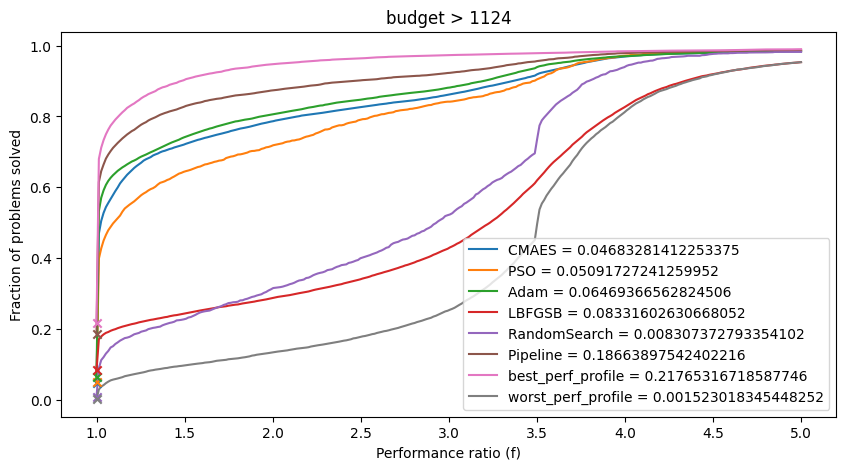

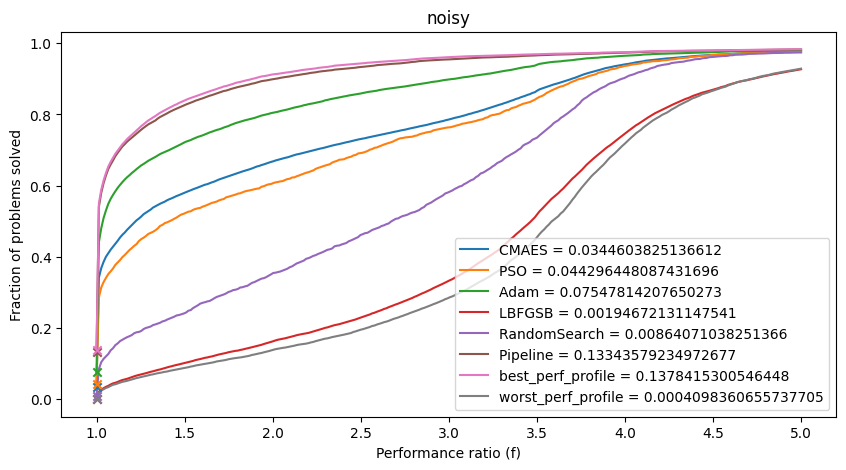

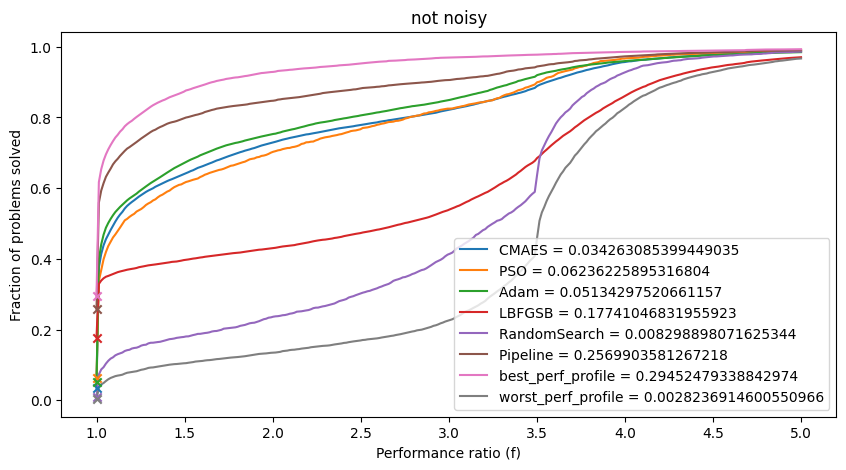

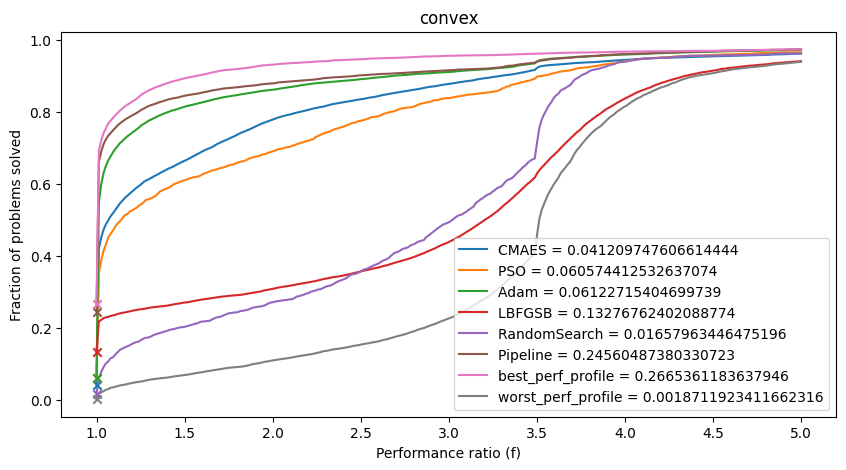

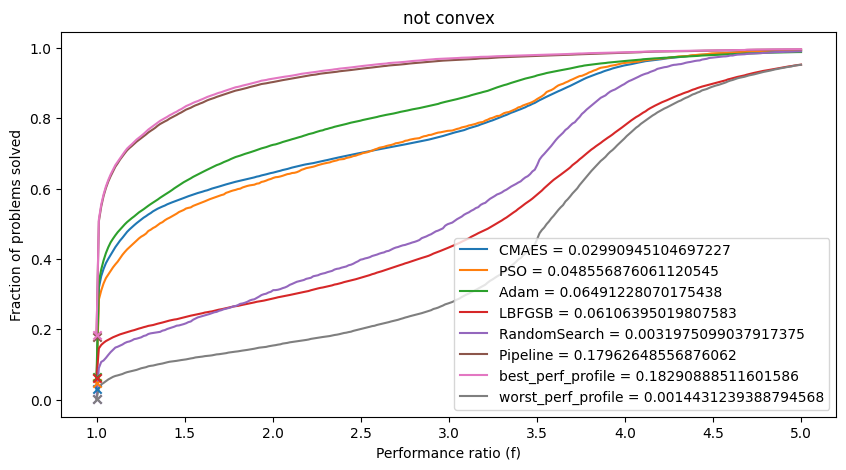

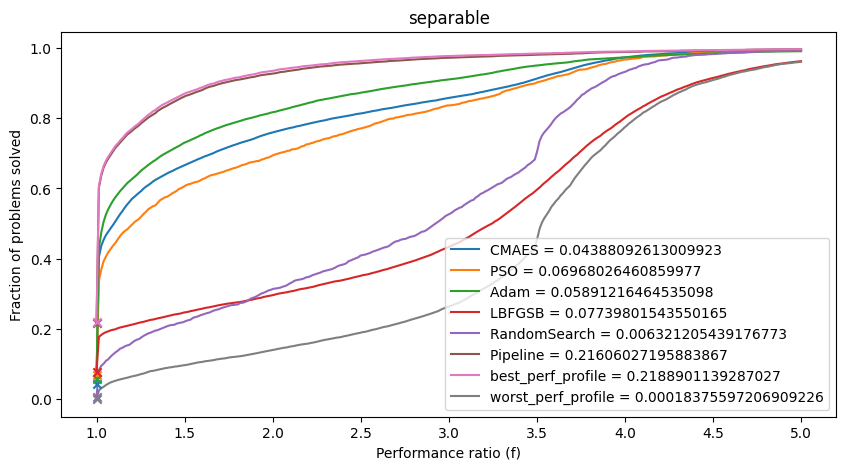

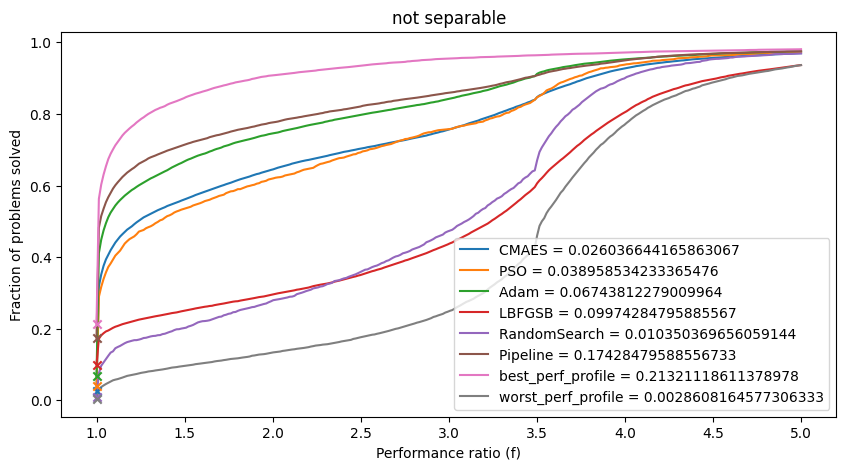

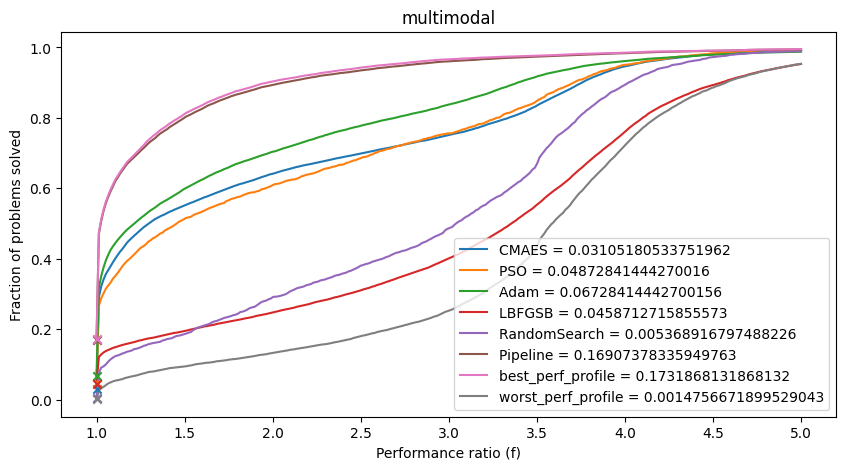

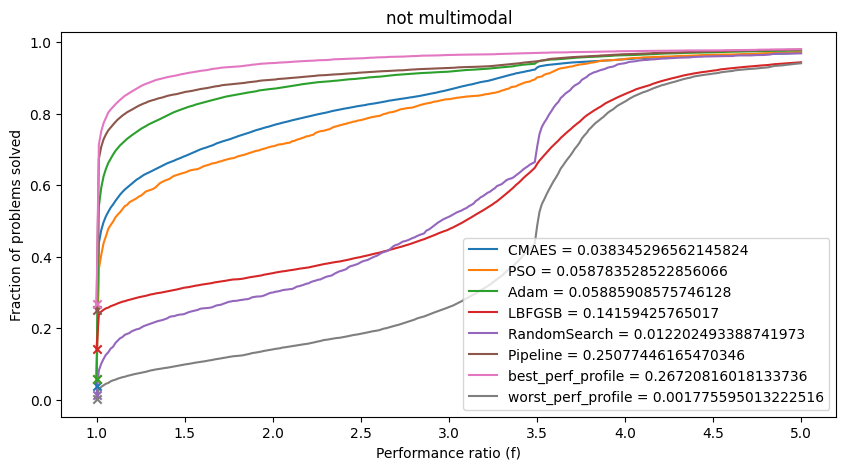

In [18]:
# plot performance profiles on subsets

for name, IDs in subsets_val.items():
    strategy_manager = l2o.StrategyManager(dataset.sel(itemID=IDs), [own_strategy])
    strategy_manager.plot()
    plt.title(name)
    plt.show()